In [1]:
from __future__ import absolute_import, print_function, division

In [2]:
import numpy as np, pandas as pd
import os, sys, re, glob

In [18]:
import json

with open('../../data/train_val2018.json') as f:
    data_str = json.load(f)
    df = pd.read_json(data_str, orient='records')

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

In [22]:
sss = StratifiedShuffleSplit(n_splits=1, random_state=101, test_size=.2)

In [23]:
gen = sss.split(df['id'], df['category'])

In [24]:
train_indices, test_indices = gen.next()

In [27]:
dftr = df[df['id'].isin(train_indices)]
dfte = df[df['id'].isin(test_indices)]

In [30]:
dftr.to_csv('../../data/train.csv', index=False, columns=['id', 'category'])
dfte.to_csv('../../data/test.csv', index=False, columns=['id', 'category'])

In [32]:
dfcount = dftr['category'].value_counts()

In [38]:
dfte['category'].max()

102

In [34]:
from matplotlib import pyplot as plt
%matplotlib inline

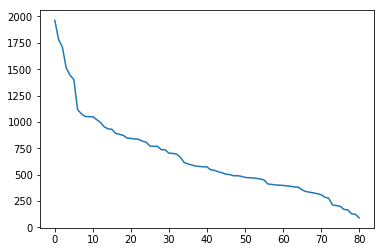

In [36]:
plt.plot(dfcount.values)